 # Web scraping of world wide holidays in 2022

In [ ]:
# Import packages for web scrapping

import requests
from bs4 import BeautifulSoup
import csv

# URL du site web à scraper
url = 'https://www.timeanddate.com/holidays/world/2022'

# Obtenir le contenu HTML de la page
response = requests.get(url)
html_content = response.content

# Utiliser BeautifulSoup pour analyser le contenu HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Initialisation de la variable data
data = []
# Trouver toutes les lignes contenant les informations de date et de nom
rows = soup.find_all("tr", {"data-mask": "1024"})

for row in rows:
    # Extraction de la date au format "2 fév"
    date = row.find("th", class_="nw").get_text(strip=True)

    # Extraction du nom de l'événement
    name = row.find("a").get_text(strip=True)
    data.append([date, name])

    print("Date :", date)
    print("Name :", name)
    print("--------")

# Écriture des données dans un fichier CSV
csv_file = "events_data.csv"
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "holidays"])  # Écrire l'en-tête

    # Écrire les données extraites
    writer.writerows(data)

print(f"Les données ont été enregistrées dans '{csv_file}' avec succès.")


Date : Jan 7
Name : International Programmers' Day
--------
Date : Jan 16
Name : World Religion Day
--------
Date : Jan 26
Name : International Customs Day
--------
Date : Jan 30
Name : World Leprosy Day
--------
Date : Feb 2
Name : World Wetlands Day
--------
Date : Feb 4
Name : World Cancer Day
--------
Date : Feb 11
Name : World Day of the Sick
--------
Date : Mar 1
Name : Self-Injury Awareness Day
--------
Date : Mar 10
Name : World Kidney Day
--------
Date : Mar 26
Name : Earth Hour
--------
Date : Mar 31
Name : International Transgender Day of Visibility
--------
Date : Apr 1
Name : April Fool's Day
--------
Date : Apr 15
Name : World Art Day
--------
Date : Apr 18
Name : International Day for Monuments and Sites
--------
Date : May 1
Name : International Family Equality Day
--------
Date : May 8
Name : World Ovarian Cancer Day
--------
Date : May 8
Name : World Red Cross and Red Crescent Day
--------
Date : May 12
Name : International Nurses Day
--------
Date : May 13
Name : Fri

In [ ]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv("events_data.csv")
# Afficher les premières lignes
df.head()

,Date,holidays
0,Jan 7,International Programmers' Day
1,Jan 16,World Religion Day
2,Jan 26,International Customs Day
3,Jan 30,World Leprosy Day
4,Feb 2,World Wetlands Day


In [ ]:
## Statistics about data
print("", df.shape)


 (38, 2)


In [ ]:
## Check data types
print('*'*30)
df.info()


******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      38 non-null     object
 1   holidays  38 non-null     object
dtypes: object(2)
memory usage: 736.0+ bytes


In [ ]:
import pandas as pd
from datetime import datetime

# Fonction pour convertir le format de date
def convert_date(date_string):
    date_object = datetime.strptime(date_string, '%b %d')
    complete_date = date_object.replace(year=2022)
    return complete_date.strftime('%Y-%m-%d')

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('events_data.csv')  # Assurez-vous que 'events_data.csv' est le nom de votre fichier

# Appliquer la fonction de conversion à la colonne 'Date'
df['Date'] = df['Date'].apply(convert_date)

# 'events_data_updated.csv' est le nouveau fichier avec les dates modifiées
df.to_csv('events_data_updated.csv', index=False)


In [ ]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv("train_test_data.csv")
# Afficher les premières lignes
df.head()

,Date,Id_compte,amount_transaction,category_transaction
0,2022-01-01 00:23:00,SEWC_CL.1,462.96,Food & Drink - Groceries
1,2022-01-01 00:26:00,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance
2,2022-01-01 01:01:00,US.1,2.24,Bank Transfers - ATM withdrawals
3,2022-01-01 01:21:00,TA.1,2.86,Transportation - Public Transport
4,2022-01-01 01:54:00,US.1,1.68,Bank Transfers - ATM withdrawals


In [ ]:
import pandas as pd


output_csv = 'train_test_data_updated.csv'  # Nom du fichier CSV de sortie

# Convertir la colonne 'Date' au format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Créer une nouvelle colonne 'Time' pour l'heure
df['Time'] = df['Date'].dt.time  # Extraction de l'heure

# Remplacer la colonne 'Date' par uniquement la date (enlever l'heure)
df['Date'] = df['Date'].dt.date  # Extraction de la date

# Afficher le résultat avec les colonnes 'Date' et 'Time'
print(df[['Date', 'Time']])
df.to_csv(output_csv, index=False)  # index=False pour ne pas sauvegarder l'index du DataFrame


             Date      Time
0      2022-01-01  00:23:00
1      2022-01-01  00:26:00
2      2022-01-01  01:01:00
3      2022-01-01  01:21:00
4      2022-01-01  01:54:00
...           ...       ...
20406  2022-11-07  05:42:00
20407  2022-11-07  05:56:00
20408  2022-11-07  06:36:00
20409  2022-11-07  06:37:00
20410  2022-11-07  06:48:00

[20411 rows x 2 columns]


In [ ]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv("train_test_data_updated.csv")
# Afficher les premières lignes
df.head()
## Statistics about data
print("", df.shape)

 (20411, 5)


In [ ]:
import pandas as pd

df1 = pd.read_csv('events_data_updated.csv')
df2 = pd.read_csv('train_test_data_updated.csv')

print(df1.shape)  # Afficher la forme (nombre de lignes, nombre de colonnes) du DataFrame df1
print(df2.shape)  # Afficher la forme (nombre de lignes, nombre de colonnes) du DataFrame df2


(38, 2)
(20411, 5)


# Merge the dataset 'train_test_data_updated' with externally scraped data 'events_data_updated'

In [ ]:
import pandas as pd

# Charger les DataFrames df1 et df2 depuis vos sources de données

# Convertir la colonne 'Date' en format datetime si ce n'est pas déjà le cas
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Fusionner les deux DataFrames en utilisant la colonne 'Date' comme clé de fusion
merged_df = df2.merge(df1, how='left', on='Date')  # Utiliser 'left' pour une jointure de type 'left'

# Identifier les lignes en double basées sur plusieurs colonnes spécifiques
colonnes_specifiques = ['Date', 'Id_compte', 'amount_transaction', 'category_transaction', 'Time']
lignes_en_double = merged_df[merged_df.duplicated(subset=colonnes_specifiques, keep=False)]

# Supprimer les lignes en double du DataFrame original
merged_df = merged_df.drop_duplicates(subset=colonnes_specifiques, keep='first')

# Enregistrer le DataFrame fusionné dans un fichier CSV
merged_df.to_csv('merged_data.csv', index=False)


#  ***EDA part***

In [ ]:
# Import packages for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Charger le jeu de données
df = pd.read_csv("merged_data.csv")
# Afficher les premières lignes
df.head()


,Date,Id_compte,amount_transaction,category_transaction,Time,holidays
0,2022-01-01,SEWC_CL.1,462.96,Food & Drink - Groceries,00:23:00,NaN
1,2022-01-01,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance,00:26:00,NaN
2,2022-01-01,US.1,2.24,Bank Transfers - ATM withdrawals,01:01:00,NaN
3,2022-01-01,TA.1,2.86,Transportation - Public Transport,01:21:00,NaN
4,2022-01-01,US.1,1.68,Bank Transfers - ATM withdrawals,01:54:00,NaN


In [ ]:
## Statistics about data
print("", df.shape)


 (20409, 6)


In [ ]:
## Check data types
print('*'*30)
df.info()


******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20409 entries, 0 to 20408
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  20409 non-null  object 
 1   Id_compte             20409 non-null  object 
 2   amount_transaction    20409 non-null  float64
 3   category_transaction  20409 non-null  object 
 4   Time                  20409 non-null  object 
 5   holidays              2178 non-null   object 
dtypes: float64(1), object(5)
memory usage: 956.8+ KB


In [ ]:

## Check for null values
print('*'*30)
df.isnull().sum()

******************************


Date                        0
Id_compte                   0
amount_transaction          0
category_transaction        0
Time                        0
holidays                18231
dtype: int64

In [ ]:
## Check for duplicates
print('*'*30)
df.duplicated(keep='first').sum()




******************************


0

In [ ]:
# Afficher les types de données de chaque colonne
df.dtypes


Date                     object
Id_compte                object
amount_transaction      float64
category_transaction     object
Time                     object
holidays                 object
dtype: object

In [ ]:
# Statistiques descriptives pour les valeurs numériques
print(df.describe())


       amount_transaction
count        20409.000000
mean            56.959925
std            150.408245
min              0.230000
25%              2.790000
50%              4.700000
75%              8.790000
max           2005.200000


In [ ]:
# Vérifier les catégories uniques et leur fréquence
print(df['category_transaction'].value_counts())


Bank Transfers - ATM fees                        3729
Transportation - Public Transport                3102
Transportation - Parking                         2569
Bank Transfers - ATM withdrawals                 2194
Food & Drink - Coffee and tea                    2162
                                                 ... 
Government + Non-Profit - Other donations           2
Bank Transfers - Banking rewards                    2
Government + Non-Profit - Political donations       2
General Merchandise  - Product refunds              2
Government + Non-Profit - Other                     1
Name: category_transaction, Length: 68, dtype: int64


In [ ]:
# Convertir la colonne 'Date' en format datetime
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Id_compte,amount_transaction,category_transaction,Time,holidays
0,2022-01-01,SEWC_CL.1,462.96,Food & Drink - Groceries,00:23:00,NaN
1,2022-01-01,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance,00:26:00,NaN
2,2022-01-01,US.1,2.24,Bank Transfers - ATM withdrawals,01:01:00,NaN
3,2022-01-01,TA.1,2.86,Transportation - Public Transport,01:21:00,NaN
4,2022-01-01,US.1,1.68,Bank Transfers - ATM withdrawals,01:54:00,NaN
...,...,...,...,...,...,...
20404,2022-11-07,SEWC_P.1,264.60,Medical - Pharmacies and supplements,05:42:00,NaN
20405,2022-11-07,SEWC_CL.1,4.63,Bank Transfers - ATM fees,05:56:00,NaN
20406,2022-11-07,SEWC_PA.1,6.96,Transportation - Parking,06:36:00,NaN
20407,2022-11-07,SEW0C_HI.1,448.44,Subscription - Others,06:37:00,NaN


In [ ]:
# Afficher les types de données de chaque colonne
df.dtypes

Date                    datetime64[ns]
Id_compte                       object
amount_transaction             float64
category_transaction            object
Time                            object
holidays                        object
dtype: object

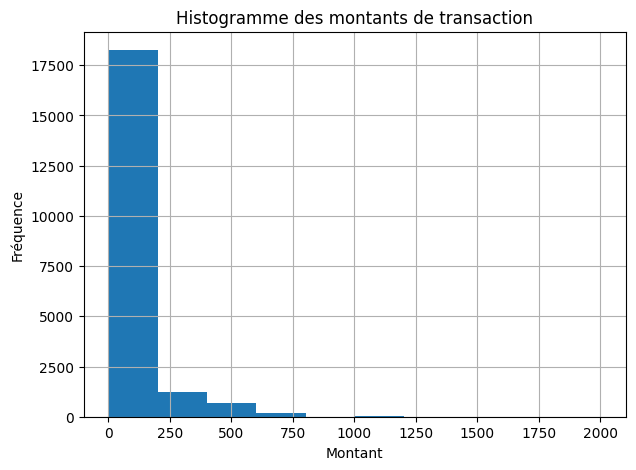

In [ ]:
# Affichage de l'histogramme des montants de transaction
df['amount_transaction'].hist(bins=10, figsize=(7, 5))
plt.title('Histogramme des montants de transaction')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
# Calcul des statistiques descriptives pour la colonne 'amount_transaction'

df["amount_transaction"].describe()


count    20409.000000
mean        56.959925
std        150.408245
min          0.230000
25%          2.790000
50%          4.700000
75%          8.790000
max       2005.200000
Name: amount_transaction, dtype: float64

In [ ]:
# Calcul de l'écart type des montants de transaction
ecart_type = df["amount_transaction"].std()

# Calcul de la moyenne des montants de transaction
moyenne = df["amount_transaction"].mean()

# Calcul de la médiane des montants de transaction
median = df["amount_transaction"].median()

# Affichage des résultats
print("Écart type des montants de transaction:", ecart_type)
print("Moyenne des montants de transaction:", moyenne)
print("Médiane des montants de transaction:", median)


Écart type des montants de transaction: 150.40824494870242
Moyenne des montants de transaction: 56.95992503307365
Médiane des montants de transaction: 4.7


In [ ]:
# Calcul du coefficient de variation
coefficient_variation = (df["amount_transaction"].std() / df["amount_transaction"].mean()) * 100

# Calcul de l'asymétrie (skewness)
asymetrie = df["amount_transaction"].skew()

# Calcul de l'aplatissement (kurtosis)
aplatissement = df["amount_transaction"].kurtosis()

# Affichage des résultats
print("Coefficient de variation des montants de transaction en pourcentage:", coefficient_variation)
print("Asymétrie (Skewness) des montants de transaction:", asymetrie)
print("Aplatissement (Kurtosis) des montants de transaction:", aplatissement)


Coefficient de variation des montants de transaction en pourcentage: 264.0597663381197
Asymétrie (Skewness) des montants de transaction: 4.2800753448106095
Aplatissement (Kurtosis) des montants de transaction: 27.25044937081793


Ces mesures statistiques décrivent la distribution des montants de transaction et indiquent une grande variabilité, une asymétrie à droite très marquée, ainsi qu'une concentration importante autour de la moyenne avec la présence de nombreuses valeurs extrêmes dans dataset.

In [ ]:
#Affichage des valeurs uniques dans la colonne 'category_transaction' et 'holidays'
df["category_transaction"].unique()
df["holidays"].unique()


array([nan, "International Programmers' Day", 'World Religion Day',
       'International Customs Day', 'World Leprosy Day',
       'World Wetlands Day', 'World Cancer Day', 'World Day of the Sick',
       'Self-Injury Awareness Day', 'World Kidney Day', 'Earth Hour',
       'International Transgender Day of Visibility', "April Fool's Day",
       'World Art Day', 'International Day for Monuments and Sites',
       'International Family Equality Day', 'World Ovarian Cancer Day',
       'International Nurses Day', 'Friday the 13th',
       'World Autoimmune / Autoinflammatory Arthritis Day',
       'African Liberation Day', 'International Overdose Awareness Day',
       'World Sexual Health Day', "Still's Disease Awareness Day",
       'World Suicide Prevention Day',
       'International Celebrate Bisexuality Day', 'World Rabies Day',
       'World Heart Day', 'World Vegetarian Day',
       'World Cerebral Palsy Day', 'World Sight Day', 'World Stroke Day',
       'World Vegan Day'], dt

In [ ]:
#Calcul de la moyenne des montants de transaction par catégorie de transaction
df.groupby(["category_transaction"])["amount_transaction"].mean()


category_transaction
Bank Transfers - ATM fees                      3.434154
Bank Transfers - ATM withdrawals               6.824312
Bank Transfers - Banking rewards             948.300000
Bank Transfers - Foreign transaction fees    808.445714
Bank Transfers - Other bank fees               8.627553
                                                ...    
Transportation - Tolls                        17.181860
Transportation-Taxis and rideshares           19.220402
Travel  - Rental cars                        756.000000
Travel - Flights                             459.612069
Travel - Lodging                             487.331481
Name: amount_transaction, Length: 68, dtype: float64

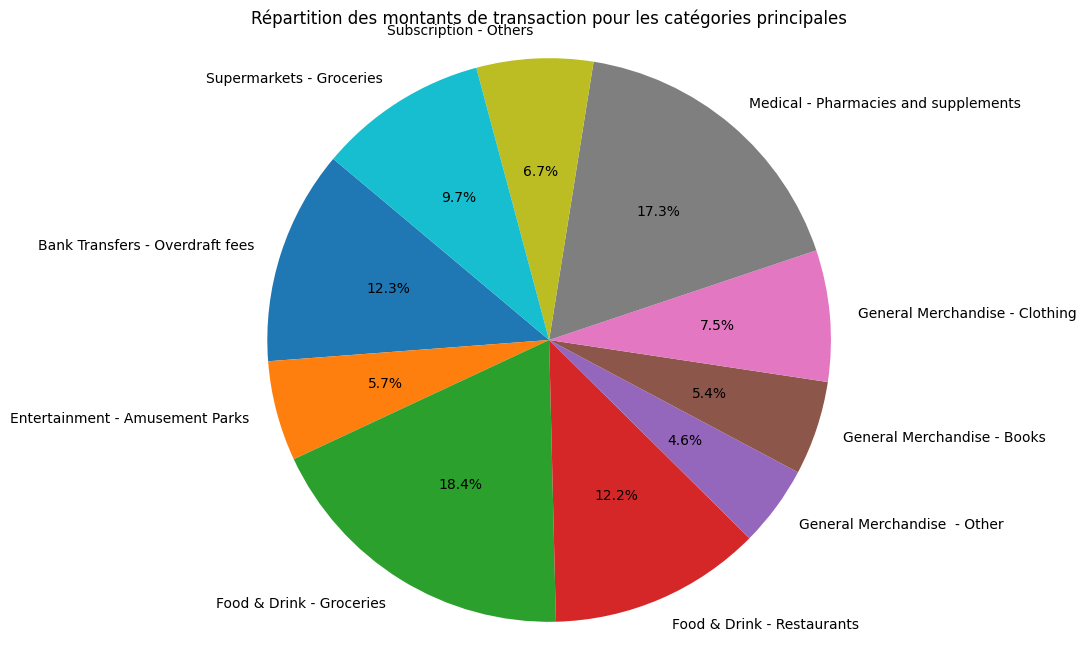

In [ ]:
# Calculer les montants totaux par catégorie de transaction
total_amounts = df.groupby("category_transaction")["amount_transaction"].sum()

# Sélectionner les N catégories les plus importantes (par exemple, les 10 premières catégories)
top_categories = total_amounts.nlargest(10).index.tolist()

filtered_df = df[df["category_transaction"].isin(top_categories)]


# Calculer les montants totaux pour les catégories sélectionnées
total_amounts_filtered = filtered_df.groupby("category_transaction")["amount_transaction"].sum()

# Créer un graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(total_amounts_filtered, labels=total_amounts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des montants de transaction pour les catégories principales')
plt.axis('equal')  # Assure un cercle parfait
plt.show()


array([[<Axes: xlabel='amount_transaction', ylabel='amount_transaction'>]],
      dtype=object)

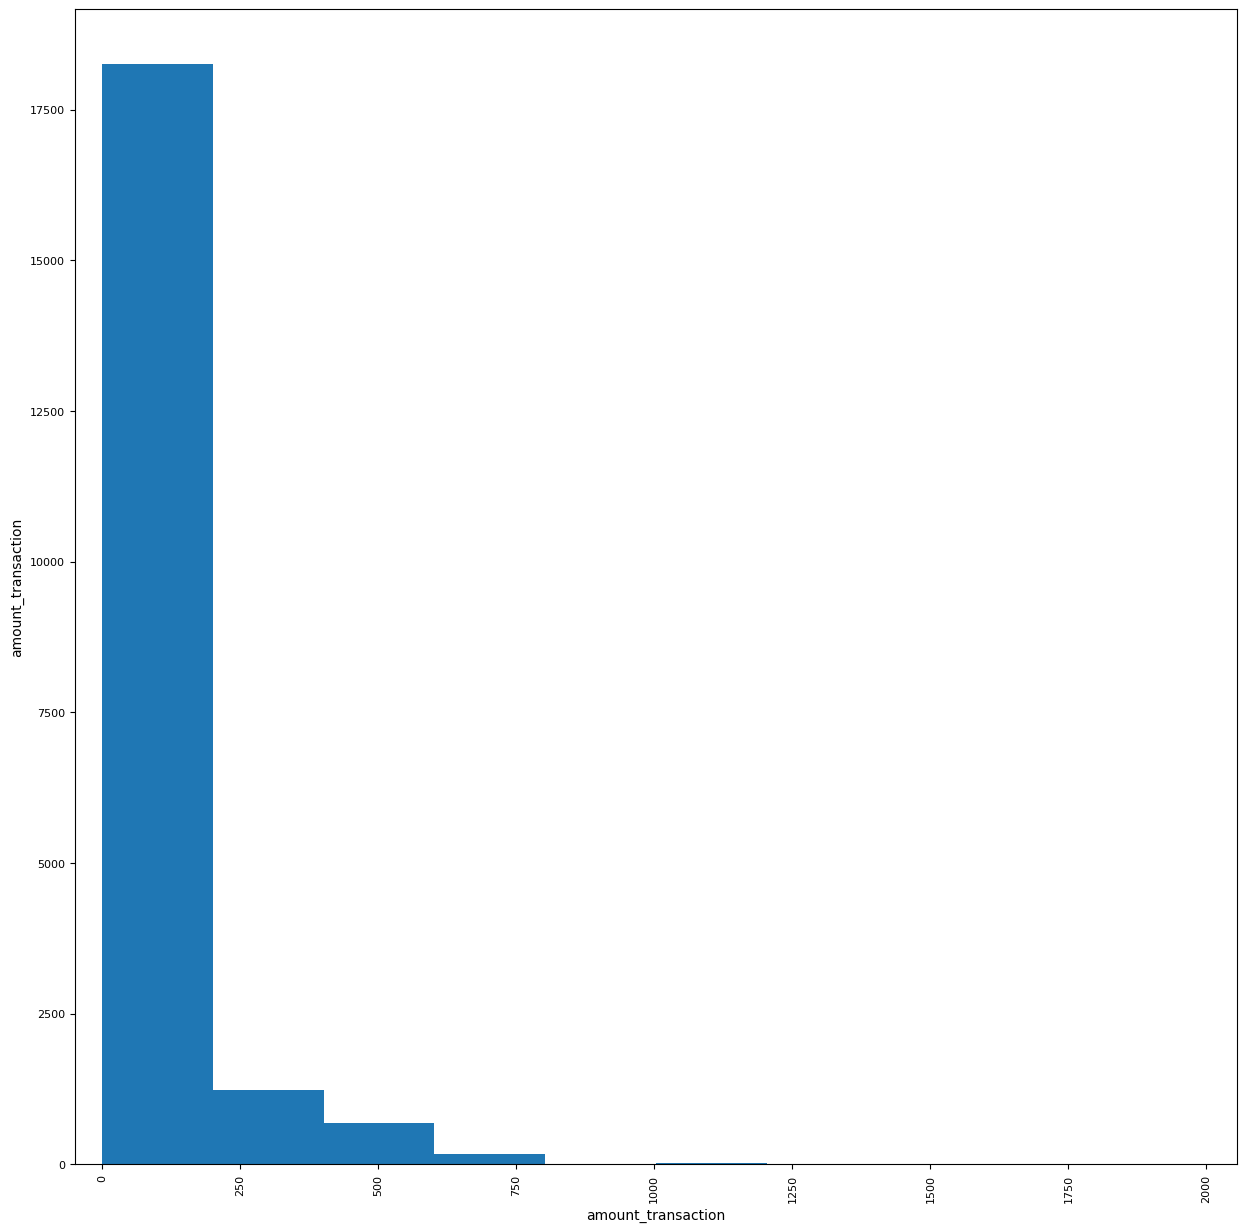

In [ ]:
#Matrice de dispersion

pd.plotting.scatter_matrix(df, figsize=(15, 15))


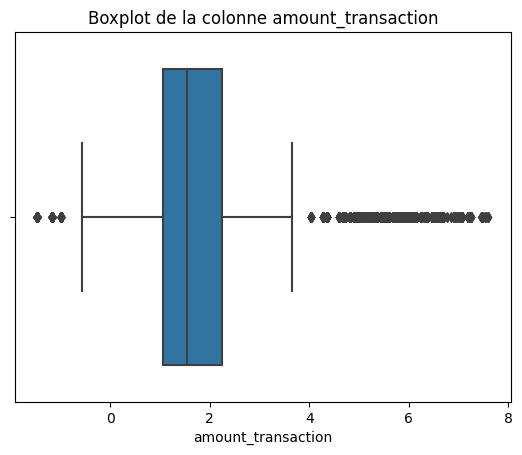

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage d'un boxplot pour la colonne 'amount_transaction'
sns.boxplot(x=df['amount_transaction'])

# Ajouter un titre au graphique
plt.title('Boxplot de la colonne amount_transaction')

# Afficher le graphique
plt.show()


il y a des valeurs aberrantes

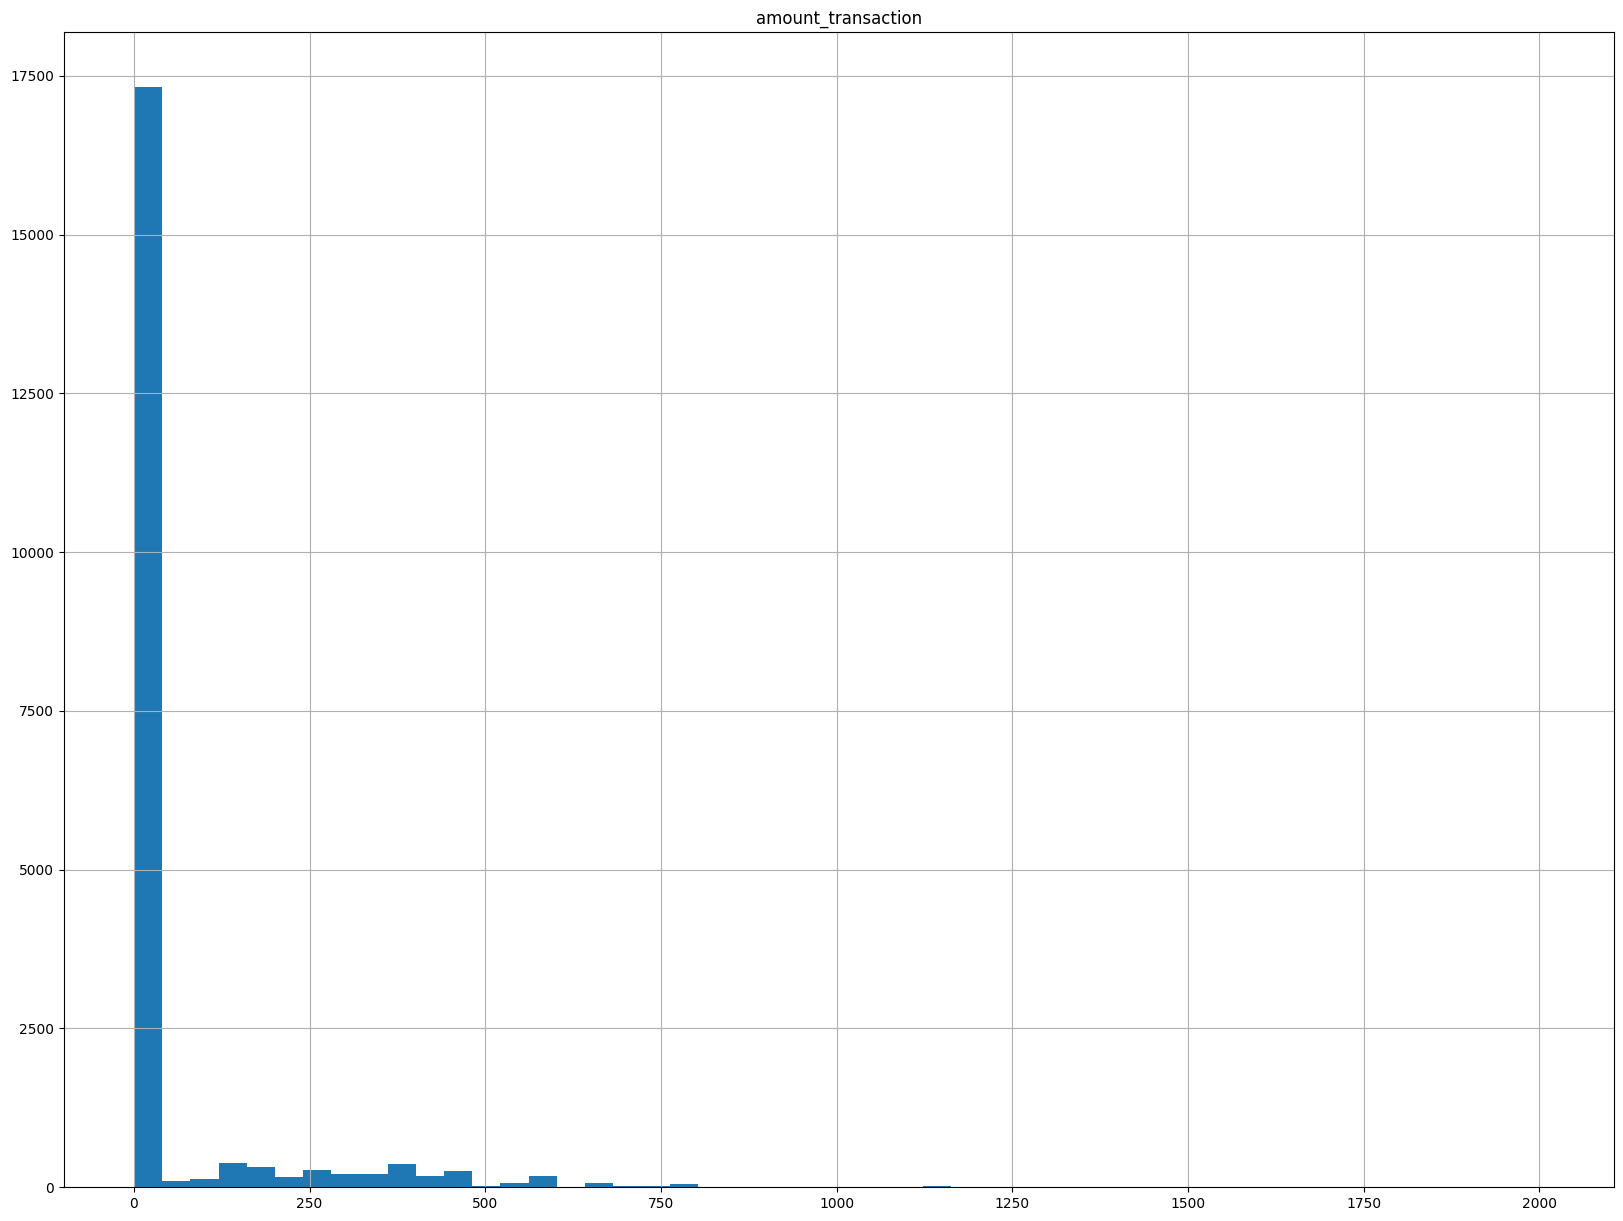

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()


#Tendances

In [ ]:
import plotly.express as px

df['Date'] = pd.to_datetime(df['Date'])

# Calculer le montant total des transactions par jour
df_plot = df.groupby('Date')['amount_transaction'].sum().reset_index()

# Créer le graphique
fig = px.line(df_plot, x='Date', y='amount_transaction', title='Montant total des transactions par jour')
fig.show()

In [ ]:
import pandas as pd

#on va convertir la colonne 'Date' en type datetime s
df['Date'] = pd.to_datetime(df['Date'])

# Extraire le mois et le jour à partir de la colonne de date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


# Afficher les premières lignes du DataFrame avec les nouvelles colonnes
print(df[['Month', 'Day']].head())
#suppresion de la colonne Date :
df.drop('Date', axis=1, inplace=True)


   Month  Day
0      1    1
1      1    1
2      1    1
3      1    1
4      1    1


In [ ]:
df

,Id_compte,amount_transaction,category_transaction,Time,holidays,Month,Day
0,SEWC_CL.1,462.96,Food & Drink - Groceries,00:23:00,NaN,1,1
1,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance,00:26:00,NaN,1,1
2,US.1,2.24,Bank Transfers - ATM withdrawals,01:01:00,NaN,1,1
3,TA.1,2.86,Transportation - Public Transport,01:21:00,NaN,1,1
4,US.1,1.68,Bank Transfers - ATM withdrawals,01:54:00,NaN,1,1
...,...,...,...,...,...,...,...
20404,SEWC_P.1,264.60,Medical - Pharmacies and supplements,05:42:00,NaN,11,7
20405,SEWC_CL.1,4.63,Bank Transfers - ATM fees,05:56:00,NaN,11,7
20406,SEWC_PA.1,6.96,Transportation - Parking,06:36:00,NaN,11,7
20407,SEW0C_HI.1,448.44,Subscription - Others,06:37:00,NaN,11,7


In [ ]:
import pandas as pd
import plotly.express as px


# Calculer le montant total des transactions par mois
df_plot_season = df.groupby('Month')['amount_transaction'].sum().reset_index()

# Créer le graphique en utilisant un diagramme à barres pour afficher les totaux par saison
fig = px.bar(df_plot_season, x='Month', y='amount_transaction', title='Total des transactions par mois')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


# Convertir la colonne 'Time' en format temps (time)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Diviser le temps en périodes de la journée : matin, midi, après-midi et nuit
def assign_period(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 14:
        return 'Noon'
    elif 14 <= hour < 19:
        return 'Afternoon'
    else:
        return 'Night'

df['DayPeriod'] = df['Time'].apply(assign_period)

# Analyse des montants de transaction par période de la journée
df_period = df.groupby('DayPeriod')['amount_transaction'].sum().reset_index()

fig_period = px.bar(df_period, x='DayPeriod', y='amount_transaction', title='Montants de transaction par période de la journée')
fig_period.show()
#Supprimez la colonne initiale des catégories:
df.drop('Time', axis=1, inplace=True)


KeyError: ignored

In [ ]:
import pandas as pd
import plotly.express as px


# Grouper les données par jour férié et calculer le nombre total de transactions et le montant total
holiday_transactions = df.groupby('holidays').agg(
    Total_Transactions=('amount_transaction', 'count'),
    Total_Amount=('amount_transaction', 'sum')
).reset_index()

# Créer un graphique en secteurs (pie chart)
fig = px.pie(holiday_transactions, values='Total_Transactions', names='holidays',
             title='Répartition du nombre total de transactions par jour férié')

fig.show()


***************** **Préparation et transformation des données** *****************

Nettoyage des données :

In [ ]:
from sklearn.impute import SimpleImputer

# Compter les occurrences des valeurs uniques dans la colonne 'holidays'
print(df['holidays'].value_counts())

# Extraction des données de la colonne 'holidays'
X = df[['holidays']]

# Imputation des valeurs manquantes avec 'Non-holiday'
cleaner = SimpleImputer(strategy='constant', fill_value='Non-holiday')
df['holidays'] = cleaner.fit_transform(X)


Non-holiday                                          18231
International Programmers' Day                         121
International Transgender Day of Visibility             82
World Art Day                                           80
World Suicide Prevention Day                            78
World Vegetarian Day                                    76
International Celebrate Bisexuality Day                 76
World Vegan Day                                         75
World Religion Day                                      74
World Ovarian Cancer Day                                73
April Fool's Day                                        71
World Kidney Day                                        71
World Cerebral Palsy Day                                68
World Heart Day                                         68
Friday the 13th                                         68
International Overdose Awareness Day                    68
World Wetlands Day                                      

In [ ]:
df.isnull().sum()


Id_compte               0
amount_transaction      0
category_transaction    0
holidays                0
Month                   0
Day                     0
DayPeriod               0
dtype: int64

Détection des enregistrements en double

In [ ]:
# Détection des lignes en double
duplicate_rows = df[df.duplicated()]

# Affichage des lignes en double
print(duplicate_rows)


         Id_compte  amount_transaction               category_transaction  \
28       SEWC_PA.1                3.48           Transportation - Parking   
51      SEW0C_HI.1                7.47   Bank Transfers - ATM withdrawals   
115     SEW0C_LI.1                1.55  Transportation - Public Transport   
141      SEWC_CL.1                5.79           Transportation - Parking   
151          IPA.1               13.37   Bank Transfers - ATM withdrawals   
...            ...                 ...                                ...   
20248     SEWC_P.1                3.78           Transportation - Parking   
20294   SEW0C_HI.1                7.47  Transportation - Public Transport   
20307         TA.1                1.43  Transportation - Public Transport   
20330  SEWC_P_PL.1                3.99      Food & Drink - Coffee and tea   
20392   SEW0C_HI.1                7.47   Bank Transfers - ATM withdrawals   

          holidays  Month  Day  DayPeriod  
28     Non-holiday      1    1 

Je vais supprimer les lignes en double.

In [ ]:
import pandas as pd


# affichage de nombre de lignes avant la suppression des doublons
print("Nombre de lignes avant la suppression des doublons :", len(df))

# la suppression des doublons en se basant sur toutes les colonnes
df = df.drop_duplicates()


# affichage des premières lignes  sans doublons
print(df.head())


Nombre de lignes avant la suppression des doublons : 20409
    Id_compte  amount_transaction  \
0   SEWC_CL.1              462.96   
1  SEW0C_LI.1               15.51   
2        US.1                2.24   
3        TA.1                2.86   
4        US.1                1.68   

                           category_transaction     holidays  Month  Day  \
0                      Food & Drink - Groceries  Non-holiday      1    1   
1  General Services - Home Repair + Maintenance  Non-holiday      1    1   
2              Bank Transfers - ATM withdrawals  Non-holiday      1    1   
3             Transportation - Public Transport  Non-holiday      1    1   
4              Bank Transfers - ATM withdrawals  Non-holiday      1    1   

  DayPeriod  
0     Night  
1     Night  
2     Night  
3     Night  
4     Night  


D'après l'affichage que j'ai réalisé sur la répartition des montants de transaction pour les principales catégories, je peux sélectionner les 5 catégories les plus fréquentes, les regrouper sous leurs noms respectifs, puis regrouper toutes les autres catégories sous le label "Autres". Ensuite, je pourrais appliquer un encodage one-hot (codage binaire) à ces catégories pour les utiliser dans l'entraînement d'un modèle

In [ ]:
#Identifiez les 5 catégories les plus fréquentes :
top_categories = df['category_transaction'].value_counts().nlargest(4).index.tolist()
#Remplacez les catégories autres que les 5 principales par "Autres" :
df.loc[~df['category_transaction'].isin(top_categories), 'category_transaction'] = 'Autres'
#Appliquez l'encodage one-hot à la colonne 'category_transaction' :
encoded_categories = pd.get_dummies(df['category_transaction'])
df = pd.concat([df, encoded_categories], axis=1)
#Supprimez la colonne initiale des catégories:
df.drop('category_transaction', axis=1, inplace=True)
df.drop('Autres', axis=1, inplace=True)




In [ ]:
df

,Id_compte,amount_transaction,Month,Day,Bank Transfers - ATM fees,Bank Transfers - ATM withdrawals,Transportation - Parking,Transportation - Public Transport,is_Holiday,Afternoon,Morning,Night
0,SEWC_CL.1,6.137641,1,1,0,0,0,0,0,0,0,1
1,SEW0C_LI.1,2.741485,1,1,0,0,0,0,0,0,0,1
2,US.1,0.806476,1,1,0,1,0,0,0,0,0,1
3,TA.1,1.050822,1,1,0,0,0,1,0,0,0,1
4,US.1,0.518794,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20404,SEWC_P.1,5.578219,11,7,0,0,0,0,0,0,1,0
20405,SEWC_CL.1,1.532557,11,7,1,0,0,0,0,0,1,0
20406,SEWC_PA.1,1.940179,11,7,0,0,1,0,0,0,1,0
20407,SEW0C_HI.1,6.105775,11,7,0,0,0,0,0,0,1,0


In [ ]:
#Pour afficher le nombre de transactions pour chaque type de holidays
transactions_by_holidays = df['holidays'].value_counts()
print(transactions_by_holidays)


Non-holiday                                          17392
International Programmers' Day                         115
International Transgender Day of Visibility             80
World Suicide Prevention Day                            76
World Art Day                                           76
World Religion Day                                      73
International Celebrate Bisexuality Day                 73
World Vegan Day                                         72
World Vegetarian Day                                    71
World Ovarian Cancer Day                                70
April Fool's Day                                        70
World Kidney Day                                        68
World Cerebral Palsy Day                                67
Friday the 13th                                         67
International Overdose Awareness Day                    67
World Heart Day                                         65
World Wetlands Day                                      

Pour la colonne 'holidays', je vais regrouper toutes les holidays sous un label appelé 'holiday', de manière à avoir deux valeurs : 'non-holiday' et 'holiday'. Ensuite, je vais appliquer un encodage one-hot

In [ ]:
# toutes les valeurs autres que 'Non-holiday' va etre sous la catégorie 'Holiday'
df['holidays'] = df['holidays'].apply(lambda x: 'Holiday' if x != 'Non-holiday' else x)

# application de le codage one-hot sur la colonne 'holidays'
one_hot_encoded = pd.get_dummies(df['holidays'], prefix='is')

df = pd.concat([df, one_hot_encoded], axis=1)

# suppression de la colonne 'holidays' d'origine
df.drop('holidays', axis=1, inplace=True)
df.drop('is_Non-holiday', axis=1, inplace=True)




In [ ]:
# affichage pour vérification
df

,Id_compte,amount_transaction,Month,Day,DayPeriod,Bank Transfers - ATM fees,Bank Transfers - ATM withdrawals,Transportation - Parking,Transportation - Public Transport,is_Holiday
0,SEWC_CL.1,462.96,1,1,Night,0,0,0,0,0
1,SEW0C_LI.1,15.51,1,1,Night,0,0,0,0,0
2,US.1,2.24,1,1,Night,0,1,0,0,0
3,TA.1,2.86,1,1,Night,0,0,0,1,0
4,US.1,1.68,1,1,Night,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20404,SEWC_P.1,264.60,11,7,Morning,0,0,0,0,0
20405,SEWC_CL.1,4.63,11,7,Morning,1,0,0,0,0
20406,SEWC_PA.1,6.96,11,7,Morning,0,0,1,0,0
20407,SEW0C_HI.1,448.44,11,7,Morning,0,0,0,0,0


La meme chose pour Pour la colonne 'DayPeriod', je vais appliquer un encodage one-hot.

In [ ]:
# application de l'encodage one-hot à la colonne 'DayPeriod'
one_hot_encoded = pd.get_dummies(df['DayPeriod'])

# l'ajout des nouvelles colonnes encodées
df = pd.concat([df, one_hot_encoded], axis=1)

# suppression de la colonne 'holidays' d'origine
df.drop('DayPeriod', axis=1, inplace=True)
df.drop('Noon', axis=1, inplace=True)



In [ ]:
# l'affichage de df pour vérifier les modifications
df

,Id_compte,amount_transaction,Month,Day,Bank Transfers - ATM fees,Bank Transfers - ATM withdrawals,Transportation - Parking,Transportation - Public Transport,is_Holiday,Afternoon,Morning,Night
0,SEWC_CL.1,462.96,1,1,0,0,0,0,0,0,0,1
1,SEW0C_LI.1,15.51,1,1,0,0,0,0,0,0,0,1
2,US.1,2.24,1,1,0,1,0,0,0,0,0,1
3,TA.1,2.86,1,1,0,0,0,1,0,0,0,1
4,US.1,1.68,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20404,SEWC_P.1,264.60,11,7,0,0,0,0,0,0,1,0
20405,SEWC_CL.1,4.63,11,7,1,0,0,0,0,0,1,0
20406,SEWC_PA.1,6.96,11,7,0,0,1,0,0,0,1,0
20407,SEW0C_HI.1,448.44,11,7,0,0,0,0,0,0,1,0


La meme chose pour Pour la colonne 'Season', je vais appliquer un encodage one-hot.

Détection et gestion des valeurs aberrantes

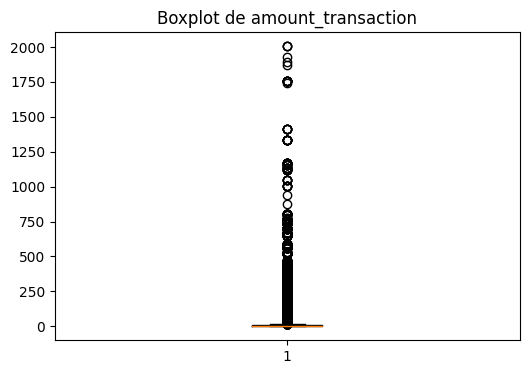

Nombre de valeurs aberrantes: 3629
Indices des valeurs aberrantes: Int64Index([    0,     9,    15,    16,    24,    35,    43,    49,    50,
               61,
            ...
            20364, 20367, 20373, 20375, 20387, 20399, 20401, 20403, 20404,
            20407],
           dtype='int64', length=3629)


,Id_compte,amount_transaction,Month,Day,Bank Transfers - ATM fees,Bank Transfers - ATM withdrawals,Transportation - Parking,Transportation - Public Transport,is_Holiday,Afternoon,Morning,Night
0,SEWC_CL.1,462.96,1,1,0,0,0,0,0,0,0,1
9,CPA_MP.1,703.44,1,1,0,0,0,0,0,0,0,1
15,SEWC_CL.1,19.29,1,1,0,0,0,0,0,0,1,0
16,US.1,168.15,1,1,0,0,0,0,0,0,1,0
24,SEWC_P.1,378.00,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20399,SEWC_PA.1,417.84,11,7,0,0,0,0,0,0,0,1
20401,SEWC_PA.1,174.10,11,7,0,0,0,0,0,0,0,1
20403,SEWC_P.1,378.00,11,7,0,0,0,0,0,0,1,0
20404,SEWC_P.1,264.60,11,7,0,0,0,0,0,0,1,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Création du diagramme en boîte pour 'amount_transaction'
plt.figure(figsize=(6, 4))
plt.boxplot(df['amount_transaction'])
plt.title('Boxplot de amount_transaction')
plt.show()

# Identification des valeurs aberrantes basées sur les quantiles
Q1 = df['amount_transaction'].quantile(0.25)
Q3 = df['amount_transaction'].quantile(0.75)
IQR = Q3 - Q1

# Détermination des limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
outliers = df[(df['amount_transaction'] < lower_bound) | (df['amount_transaction'] > upper_bound)]

print("Nombre de valeurs aberrantes:", len(outliers))
print("Indices des valeurs aberrantes:", outliers.index)

outliers

In [ ]:

# Nombre total de valeurs aberrantes
print("Nombre de valeurs aberrantes:", len(outliers))

# Filtrer les valeurs aberrantes pour 'holidays' et 'non-holidays'
outliers_holidays = outliers[outliers['is_Holiday'] == 1]
outliers_non_holidays = outliers[outliers['is_Holiday'] != 1]

# Nombre de valeurs aberrantes dans 'holidays' et 'non-holidays'
print("Nombre de valeurs aberrantes dans les jours fériés:", len(outliers_holidays))
print("Nombre de valeurs aberrantes dans les jours non fériés:", len(outliers_non_holidays))

Nombre de valeurs aberrantes: 3629
Nombre de valeurs aberrantes dans les jours fériés: 371
Nombre de valeurs aberrantes dans les jours non fériés: 3258


D'après ma remarque sur les valeurs aberrantes, la plupart se trouvent dans la catégorie "no holiday", donc ne sont pas des erreurs et ne peuvent pas être simplement supprimées car elles représentent une part importante des données. Ce que je propose de faire, c'est d'utiliser la transformation logarithmique pour atténuer l'effet de ces valeurs aberrantes.

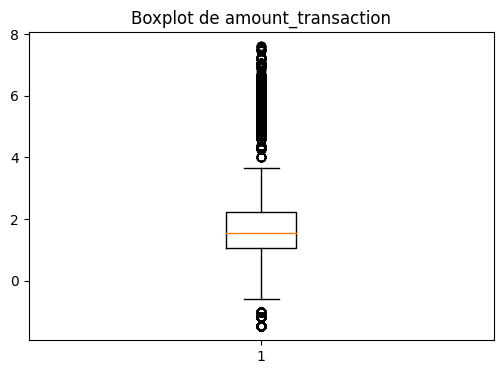

In [ ]:
# Appliquer la transformation logarithmique aux valeurs aberrantes
df['amount_transaction'] = np.log(df['amount_transaction'])

# Visualisation des valeurs transformées
plt.figure(figsize=(6, 4))
plt.boxplot(df['amount_transaction'])
plt.title('Boxplot de amount_transaction')
plt.show()

In [ ]:
# Calculer les variances de chaque colonne
variances = df.var()

# Afficher les variances de toutes les colonnes
print(variances)


amount_transaction                    3.143701
Month                                 8.646931
Day                                  77.141606
Bank Transfers - ATM fees             0.150559
Bank Transfers - ATM withdrawals      0.095596
Transportation - Parking              0.105085
Transportation - Public Transport     0.124256
is_Holiday                            0.095919
Afternoon                             0.165489
Morning                               0.210506
Night                                 0.240872
dtype: float64


<ipython-input-661-6846f20b979d>:2: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = df.drop('Id_compte', axis=1).columns

# Convertir les colonnes de type uint8 en float64
uint8_columns = ['Bank Transfers - ATM fees', 'Bank Transfers - ATM withdrawals', 'Transportation - Parking',
                 'Transportation - Public Transport', 'is_Holiday', 'Afternoon', 'Morning', 'Night']

df[uint8_columns] = df[uint8_columns].astype('float64')

# Maintenant, vous pouvez appliquer la normalisation sur les colonnes sélectionnées
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])




In [ ]:
df

,Id_compte,amount_transaction,Month,Day,Bank Transfers - ATM fees,Bank Transfers - ATM withdrawals,Transportation - Parking,Transportation - Public Transport,is_Holiday,Afternoon,Morning,Night
0,SEWC_CL.1,0.838440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SEW0C_LI.1,0.464133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,US.1,0.250866,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,TA.1,0.277797,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,US.1,0.219159,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20404,SEWC_P.1,0.776784,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20405,SEWC_CL.1,0.330891,1.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20406,SEWC_PA.1,0.375817,1.0,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20407,SEW0C_HI.1,0.834928,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


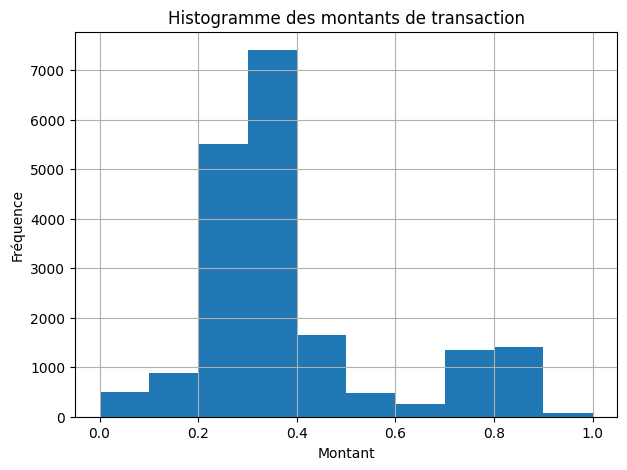

In [ ]:
# Affichage de l'histogramme des montants de transaction
df['amount_transaction'].hist(bins=10, figsize=(7, 5))
plt.title('Histogramme des montants de transaction')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
df

,Id_compte,amount_transaction,Month,Day,Bank Transfers - ATM fees,Bank Transfers - ATM withdrawals,Transportation - Parking,Transportation - Public Transport,is_Holiday,Afternoon,Morning,Night
0,SEWC_CL.1,6.137641,1,1,0,0,0,0,0,0,0,1
1,SEW0C_LI.1,2.741485,1,1,0,0,0,0,0,0,0,1
2,US.1,0.806476,1,1,0,1,0,0,0,0,0,1
3,TA.1,1.050822,1,1,0,0,0,1,0,0,0,1
4,US.1,0.518794,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20404,SEWC_P.1,5.578219,11,7,0,0,0,0,0,0,1,0
20405,SEWC_CL.1,1.532557,11,7,1,0,0,0,0,0,1,0
20406,SEWC_PA.1,1.940179,11,7,0,0,1,0,0,0,1,0
20407,SEW0C_HI.1,6.105775,11,7,0,0,0,0,0,0,1,0


<ipython-input-667-8f115c87d7bc>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



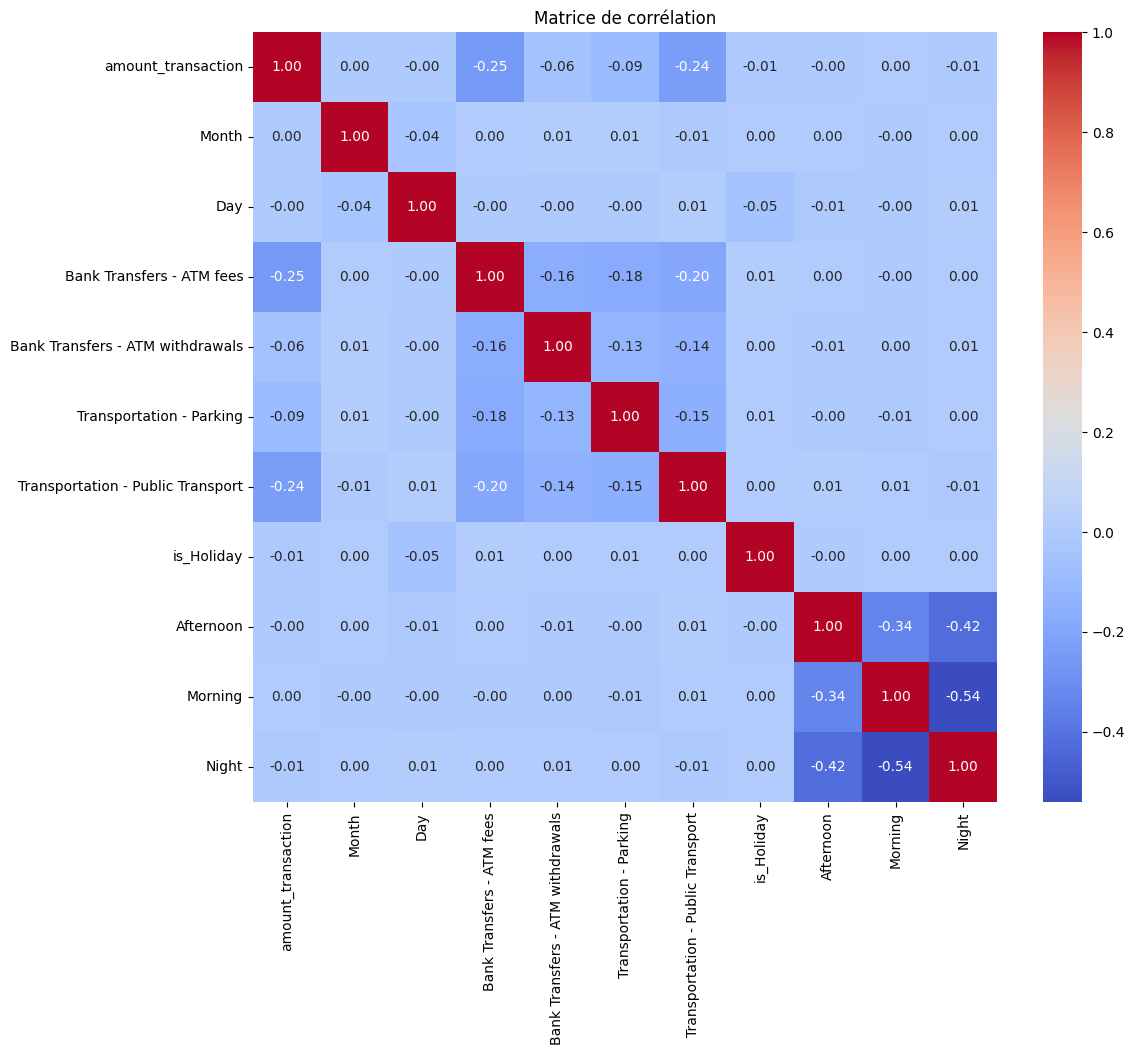

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
# Calculer la matrice de corrélation
correlation_matrix = df.corr()
# Créer un heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


In [ ]:
# Afficher les types de données de chaque colonne
df.dtypes

Id_compte                             object
amount_transaction                   float64
Month                                  int64
Day                                    int64
Bank Transfers - ATM fees              uint8
Bank Transfers - ATM withdrawals       uint8
Transportation - Parking               uint8
Transportation - Public Transport      uint8
is_Holiday                             uint8
Afternoon                              uint8
Morning                                uint8
Night                                  uint8
dtype: object

 ******** **Model Building** ************

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop(['Id_compte', 'amount_transaction'], axis=1)
y = df['amount_transaction']

# Division en jeu d'entraînement, jeu de validation et jeu de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Initialisation de RFE avec le modèle et le nombre de caractéristiques à sélectionner
rfe = RFE(estimator=model, n_features_to_select=8)  # Choisissez le nombre de caractéristiques à sélectionner

# Adapter RFE aux données d'entraînement
rfe.fit(X_train, y_train)

# Sélection des caractéristiques
selected_features = X.columns[rfe.support_]
X_train_rfe = X_train[selected_features]
X_val_rfe = X_val[selected_features]

# Entraînement du modèle sur les données sélectionnées par RFE
model.fit(X_train_rfe, y_train)

# Prédiction sur le jeu de validation
y_val_pred = model.predict(X_val_rfe)

# Calcul de l'erreur quadratique moyenne (MSE) sur le jeu de validation
mse = mean_squared_error(y_val, y_val_pred)
print("Erreur quadratique moyenne sur le jeu de validation :", mse)

# Calcul du coefficient de détermination (R²) sur le jeu de validation
r2 = r2_score(y_val, y_val_pred)
print("Coefficient de détermination sur le jeu de validation :", r2)



Erreur quadratique moyenne sur le jeu de validation : 0.028624553936007654
Coefficient de détermination sur le jeu de validation : 0.2541973169747912


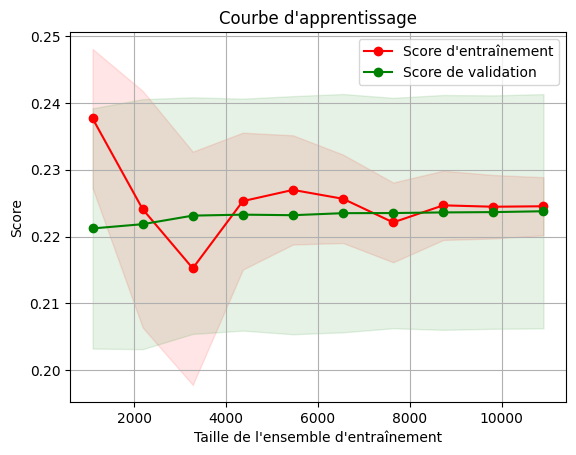

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Courbe d'apprentissage")
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

    plt.legend(loc="best")
    plt.show()

# Utilisation de la fonction avec votre modèle et vos données
plot_learning_curve(model, X_train, y_train)



Erreur quadratique moyenne sur le jeu de validation : 0.028624553936007654
Coefficient de détermination sur le jeu de validation : 0.2541973169747912


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df.drop(['Id_compte', 'amount_transaction'], axis=1)
y = df['amount_transaction']

# Division en ensembles d'entraînement et de test (par exemple, 70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation du modèle RandomForestRegressor
model_rf = RandomForestRegressor()

# Entraînement du modèle
model_rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_rf = model_rf.predict(X_test)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Erreur quadratique moyenne (MSE) :", mse_rf)
print("Coefficient de détermination (R²) :", r2_rf)


Erreur quadratique moyenne (MSE) : 0.03605098200636501
Coefficient de détermination (R²) : 0.06150919101687702


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialisation du modèle GradientBoostingRegressor
model_gb = GradientBoostingRegressor()

# Entraînement du modèle
model_gb.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_gb = model_gb.predict(X_test)

# Évaluation du modèle
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Erreur quadratique moyenne (MSE) :", mse_gb)
print("Coefficient de détermination (R²) :", r2_gb)


Erreur quadratique moyenne (MSE) : 0.029471385974011242
Coefficient de détermination (R²) : 0.23279136030967518


In [ ]:
from sklearn.ensemble import VotingRegressor

# Initialisation du VotingRegressor avec les modèles Random Forest et Gradient Boosting
voting_regressor = VotingRegressor(estimators=[('rf', model_rf), ('gb', model_gb)])

# Entraînement du VotingRegressor
voting_regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_voting = voting_regressor.predict(X_test)

# Évaluation du modèle
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print("Erreur quadratique moyenne (MSE) :", mse_voting)
print("Coefficient de détermination (R²) :", r2_voting)


Erreur quadratique moyenne (MSE) : 0.031232158296558024
Coefficient de détermination (R²) : 0.18695436643443852
